In [100]:
import pandas as pd

from ta import add_all_ta_features
from ta.utils import dropna

from ta.momentum import AwesomeOscillatorIndicator
from ta.momentum import ROCIndicator
from ta.momentum import StochRSIIndicator
from ta.momentum import StochasticOscillator
from ta.momentum import RSIIndicator

from ta.volume import AccDistIndexIndicator
from ta.volume import ForceIndexIndicator
from ta.volume import NegativeVolumeIndexIndicator

from ta.trend import EMAIndicator
from ta.trend import MACD
from ta.trend import SMAIndicator

from ta.volatility import BollingerBands

In [123]:
def TA_APPLICATION(data):
   
    # Load data
    data = pd.read_csv(data, sep="\t")
    data = data.rename(columns = {'<DATE>':'date','<OPEN>':'open', '<HIGH>':'high', '<LOW>':'low', '<CLOSE>':'close',
                                  '<TICKVOL>':'tickvol','<VOL>':'volume','<SPREAD>':'spread'})

    # Momentum Indicators
    indicator_AOI = AwesomeOscillatorIndicator(high=data['high'], low=data['low'], window1=5, window2=34, fillna=False)
    data['AOI'] = indicator_AOI.awesome_oscillator()

    indicator_ROC = ROCIndicator(close=data['close'], window=12, fillna=False)
    data['ROC'] = indicator_ROC.roc()
    
    indicator_RSI5 = RSIIndicator(close=data['close'], window=5, fillna=False)
    indicator_RSI10 = RSIIndicator(close=data['close'], window=10, fillna=False)
    indicator_RSI15 = RSIIndicator(close=data['close'], window=15, fillna=False)
    indicator_RSI20 = RSIIndicator(close=data['close'], window=20, fillna=False)
    data['RSI5'] = indicator_RSI5.rsi()
    data['RSI10'] = indicator_RSI10.rsi()
    data['RSI15'] = indicator_RSI15.rsi()
    data['RSI20'] = indicator_RSI20.rsi()

    indicator_StochRSI = StochRSIIndicator(close=data['close'], window=14, smooth1=3, smooth2=3, fillna=False)
    data['StochRSI'] = indicator_StochRSI.stochrsi()
    data['RSI %d'] = indicator_StochRSI.stochrsi_d()
    data['RSI %k'] = indicator_StochRSI.stochrsi_k()

    indicator_SO = StochasticOscillator(close=data['close'], high=data['high'], low=data['low'], window=14, smooth_window=3, fillna=False)
    data['StochOscillator'] = indicator_SO.stoch()
    data['Stoch_osc_signal'] = indicator_SO.stoch_signal()

    # Volume Indicators 
    indicator_ADI = AccDistIndexIndicator(high=data['high'], low=data['low'], close=data['close'], volume=data['volume'])
    data['ADI'] = indicator_ADI.acc_dist_index()

    indicator_FI = ForceIndexIndicator(close=data['close'], volume=data['volume'], window=20)
    data['FI'] = indicator_FI.force_index()

    indicator_NVI = NegativeVolumeIndexIndicator(close=data['close'], volume=data['volume'])
    data['NVI'] = indicator_NVI.negative_volume_index()

    # Volatility  Indicators
    indicator_bb = BollingerBands(close=data['close'], window=20, window_dev=2, fillna=False)

    data['bb_bbm'] = indicator_bb.bollinger_mavg()
    data['bb_bbh'] = indicator_bb.bollinger_hband()
    data['bb_bbl'] = indicator_bb.bollinger_lband()

    data['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()
    data['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

    # Trend Indicators
    indicator_EMA = EMAIndicator(close=data['close'], window=14, fillna=False)
    data['EMA'] = indicator_EMA.ema_indicator()

    indicator_MACD = MACD(close=data['close'], window_fast=12, window_slow=26, window_sign=9, fillna=False)
    data['MACD'] = indicator_MACD.macd()
    data['MACD_diff'] = indicator_MACD.macd_diff()
    data['MACD_signal'] = indicator_MACD.macd_signal()

    indicator_SMA13 = SMAIndicator(close=data['close'], window=13, fillna=False)
    indicator_SMA21 = SMAIndicator(close=data['close'], window=21, fillna=False)
    indicator_SMA34 = SMAIndicator(close=data['close'], window=34, fillna=False)

    data['SMA13'] = indicator_SMA13.sma_indicator()
    data['SMA21'] = indicator_SMA21.sma_indicator()
    data['SMA34'] = indicator_SMA34.sma_indicator()
    #data['SMA1'] = data['close'].rolling(26).mean()

    return data


CPU times: user 62.3 ms, sys: 10.2 ms, total: 72.5 ms
Wall time: 97.5 ms
CPU times: user 59.2 ms, sys: 896 µs, total: 60.1 ms
Wall time: 60.1 ms


(100.0, 1500.0)

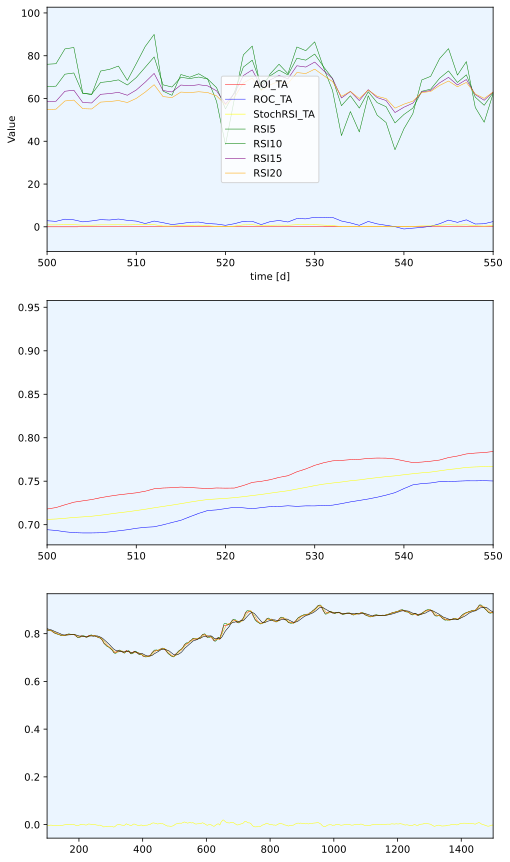

In [133]:
import matplotlib as mpl
mpl.use('MACOSX')
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='svg'

%time processed_data = TA_APPLICATION('forex_data.csv')
%time processed_denoised_data = TA_APPLICATION('forex_data.csv')
"""
CPU times: user 80.6 ms, sys: 3.91 ms, total: 84.5 ms
Wall time: 87.3 ms
"""
#processed_data.info()
for col in processed_data.columns[1:]:
    median = processed_data[col].median()
    processed_data[col] = processed_data[col].fillna(median)

fig, axes = plt.subplots(3, 1, figsize=(8, 15), subplot_kw={'facecolor': "#ebf5ff"})
# Plot Momentum Indicators on position axes[0]
axes[0].plot(processed_data['AOI'], label="AOI_TA", color='red', lw=0.5)
axes[0].plot(processed_data['ROC'], label="ROC_TA", color='blue', lw=0.5)
axes[0].plot(processed_data['StochRSI'], label="StochRSI_TA", color='yellow', lw=0.5)
axes[0].plot(processed_data['RSI5'], label="RSI5", color='green', lw=0.5)
axes[0].plot(processed_data['RSI10'], label="RSI10", color='green', lw=0.5)
axes[0].plot(processed_data['RSI15'], label="RSI15", color='purple', lw=0.5)
axes[0].plot(processed_data['RSI20'], label="RSI20", color='orange', lw=0.5)
axes[0].set_xlim(500, 550)
axes[0].set_xlabel("time [d]")
axes[0].set_ylabel("Value")
axes[0].legend()
#axes[0].plot(data['StochOscillator'], label="StochOscillator_TA", color='green', lw=0.5)
# Plot Volatility Indicators on position axes[1]
axes[1].plot(processed_data['bb_bbh'], label="bb_bbh_ta", color='red', lw=0.5)
axes[1].plot(processed_data['bb_bbl'], label="bb_bbl_ta", color='blue', lw=0.5)
axes[1].plot(processed_data['bb_bbm'], label="bb_bbm_ta", color='yellow', lw=0.5)
axes[1].set_xlim(500, 550)
# Plot Trend Indicators on position axes[2]
axes[2].plot(processed_data['EMA'], label="EMA_TA", color='red', lw=0.5)
axes[2].plot(processed_data['MACD'], label="MACD_TA", color='yellow', lw=0.5)
axes[2].plot(processed_data['SMA13'], label="SMA_TA13", color='green', lw=0.5)
axes[2].plot(processed_data['SMA21'], label="SMA_TA21", color='orange', lw=0.5)
axes[2].plot(processed_data['SMA34'], label="SMA_TA34", color='black', lw=0.5)
axes[2].set_xlim(100, 1500)


In [54]:
import numpy as np
import time

def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Calculates MAPE between y_true and y_pred
    """
    mask_y = y_true!=0
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true[mask_y] - y_pred[mask_y]) / y_true[mask_y])) * 100

# Data Normalization
def normalize_function(data):
    max_num = np.amax(data, axis=0)
    min_num = np.amin(data, axis=0)
    normalized = []
    for num in data:
        normalized.append((num - min_num) / (max_num - min_num))
    return normalized

def timeit(func):
    """
    @timeit
    """
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"Execution time of {func.__name__}: {end - start} seconds")
        return result
    return wrapper

In [62]:
import matplotlib as mpl
mpl.use('MACOSX')
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='svg'

#fig, axes = plt.subplots(1, 3, figsize=(12, 3))

#axes[0].plot(processed_data[['close','SMA']])
